## Import

In [8]:
# !pip uninstall numpy

In [1]:
import os
import glob
import json
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

## Get data

In [10]:
ROOT_DATA_PATH = '/mnt/workout_analisys/data/prep_posts'
YEAR = 2023
OUTPUT_PATH = f'/mnt/workout_analisys/data/{YEAR}_data.csv'

In [18]:
files_list = glob.glob(f"{ROOT_DATA_PATH}/posts_{YEAR}*.json")

In [19]:
files_list

['/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_557.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_450.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_500.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_50.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_300.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_100.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_200.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_550.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_150.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_350.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_400.json',
 '/mnt/workout_analisys/data/prep_posts/posts_2023_prep_diary_250.json']

In [13]:
def preprocess_data(exercisies: dict) -> dict:
    #TODO: дописать сюда замену названий упражнений
    pass

In [24]:
# Load the JSON file
# for data_file in files_list:
def get_dataframe(data):
    # with open(data_file, 'r', encoding='utf-8') as file:
    #     data = json.load(file)

    # Collect unique exercise names
    all_exercises = set()
    for entry in data:
        if (entry["dairy"] == True) and (entry["exercises"] != None):
            # print(entry["exercises"])
            try:
                all_exercises.update(entry.get('exercises', {}).keys())
            except AttributeError:
                print(entry["exercises"])

    # Prepare the DataFrame
    columns = ['date'] + sorted(all_exercises)
    rows = []

    for entry in data:
        if (entry["dairy"] == True) and (entry["exercises"] != None):
            row = {exercise: 0 for exercise in all_exercises}  # Initialize with zeros
            row['date'] = entry['date']
            for exercise, count in entry.get('exercises', {}).items():
                row[exercise] = count
            rows.append(row)
    df = pd.DataFrame(rows, columns=columns)
    return df


In [31]:
all_data = []
for data_file in files_list:
    with open(data_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
        for obj in data:
            all_data.append(obj)
print(len(all_data))



557


In [32]:
df23 = get_dataframe(all_data)

### Preprocessing

### 2023

In [33]:
for column in df23.columns:
    print(column)

date
L-подтягивания
Австралийские подтягивания
Австралийские подтягивания на бицепс
Австралийские подтягивания нижним хватом на бицепс
Австралийские подтягивания нижним хватом с техникой на бицепс
Австралийский тюлень
Боковые подъемы ног
Боковые подъемы ног к перекладине
Боковые скручивания в висе с согнутыми ногами
Болгарские приседания
Бриллиантовые отжимания от сосисок
Выпады
Выпрыгивания
Выходы силой
Выходы силой (Л-лесенка)
Динамический всадник
Додо
Додо/дронт
Максимально высокие подтягивания
Отжимания
Отжимания на брусьях
Отжимания на брусьях 'Лабиринт'
Отжимания на брусьях в группировке
Отжимания от низкой перекладины
Отжимания от низкой ступеньки
Отжимания от пола
Отжимания от ступеньки
Отжимания руки выше ног
Переход в нижний вис
Переход в передний вис
Переходы в вис прямой
Переходы в передний вис
Подтягивания
Подтягивания "Австралийский тюлень"
Подтягивания "Австралийский тюлень" на заднюю дельту
Подтягивания 'Австралийский тюлень на задние дельты'
Подтягивания 'Австралийский

In [34]:
new_name = {
    "Австралийские подтягивания на бицепс":"Австралийские подтягивания",
    "Австралийские подтягивания нижним хватом с техникой на бицепс": "Австралийские подтягивания нижним хватом на бицепс",
    "Боковые подъемы ног к перекладине": "Боковые подъемы ног",
    "Выходы силой (Л-лесенка)":"Выходы силой",
    "Додо/дронт":"Додо",
    "Отжимания на брусьях 'Лабиринт'":"Отжимания на брусьях",
    "Отжимания на брусьях в группировке":"Отжимания на брусьях",
    "Отжимания от низкой ступеньки":"Отжимания от низкой перекладины",
    "Отжимания от ступеньки":"Отжимания от низкой перекладины",
    "Отжимания руки выше ног": "Отжимания от низкой перекладины",
    "Переход в передний вис":"Переход в нижний вис",
    "Переходы в вис прямой":"Переход в нижний вис",
    "Переходы в передний вис":"Переход в нижний вис",
    "Подъемы в передний вис":"Переход в нижний вис",
    "Подтягивания 'Л-лесенка от 1 до 10 с шагом 1'": "Подтягивания",
    'Подтягивания "Австралийский тюлень"': "Подтягивания 'Австралийский тюлень'",
    'Подтягивания "Австралийский тюлень" на заднюю дельту': "Подтягивания 'Австралийский тюлень'",
    "Подтягивания 'Австралийский тюлень на задние дельты'": "Подтягивания 'Австралийский тюлень'",
    "Подтягивания Австралийский тюлень": "Подтягивания 'Австралийский тюлень'",
    "Подтягивания Австралийский тюлень на задние дельты": "Подтягивания 'Австралийский тюлень'",
    "Подтягивания со сведением лопаток": "Подтягивания",
    "Подъемы на носках": "Подъемы на носки",
    "Подъемы на носки в максимальной амплитуде": "Подъемы на носки",
    "Подъемы на носки сидя с руками на столбе": "Подъемы на носки сидя",
    "Приседания на одной ноге":"Приседания на одной",
    "Приседания с быстрым подъемом": "Приседания",
}

In [35]:
df23 = df23.rename(columns=new_name)
columns = df23.columns
duplicate_columns = {col for col in columns if list(columns).count(col) > 1}

# Merge columns with the same name
for col in duplicate_columns:
    df23[col] = df23.filter(like=col).sum(axis=1)

# Drop the duplicate columns
df23 = df23.loc[:, ~df23.columns.duplicated()]

In [36]:

print('Подтягивания', df23['Подтягивания'].sum())
df23['Подтягивания'] += (df23['Подтягивания + Отжимания от пола'] / 2)
print('Подтягивания', df23['Подтягивания'].sum())


print('Отжимания от пола', df23['Отжимания от пола'].sum())
df23['Отжимания от пола'] += (df23['Подтягивания + Отжимания от пола'] / 2)
print('Отжимания от пола', df23['Отжимания от пола'].sum())
df23 = df23.drop(['Подтягивания + Отжимания от пола'], axis=1)

print('Подтягивания', df23['Подтягивания'].sum())
df23['Подтягивания'] += (df23['Подтягивания + отжимания от низкой перекладины'] / 2)
print('Подтягивания', df23['Подтягивания'].sum())


print('Отжимания от низкой перекладины', df23['Отжимания от низкой перекладины'].sum())
df23['Отжимания от низкой перекладины'] += (df23['Подтягивания + отжимания от низкой перекладины'] / 2)
print('Отжимания от низкой перекладины', df23['Отжимания от низкой перекладины'].sum())
df23 = df23.drop(['Подтягивания + отжимания от низкой перекладины'], axis=1)

Подтягивания 23132
Подтягивания 23169.5
Отжимания от пола 16280
Отжимания от пола 16317.5
Подтягивания 23169.5
Подтягивания 23357.0
Отжимания от низкой перекладины 10615
Отжимания от низкой перекладины 10802.5


In [37]:
df23.to_csv(OUTPUT_PATH, index=False)

### 2024

In [17]:
new_name = {"Отжимания 'нырок щуки'": 'Отжимания "нырок щуки"',
            'Отжимания "Нырок щуки"': 'Отжимания "нырок щуки"',
            'Боковые подъемы ног к перекладине': 'Боковые подъемы ног',
            'Австралийские подтягивания нижним ложным хватом на бицепс': 'Австралийские подтягивания на бицепс',
            'Додо/дронт': 'Додо',
            'Отжимания на брусьях (5-минутки)': 'Отжимания на брусьях',
            'Отжимания от широких брусьев': 'Отжимания на широких брусьях',
            "Подтягивания 'Австралийский тюлень'": 'Подтягивания "Австралийский тюлень"',
            "Подъемы в передний вис'": 'Подъемы в передний вис',
            'Подъемы на носки в максимальной амплитуде': 'Подъемы на носки',
            'Подъёмы ног к перекладине, колени к груди': 'Подъёмы ног к перекладине',
            'Подъемы на носки сидя с руками на столбе': 'Подъемы на носки сидя',
            'Отжимания от низкой перекладины (5-минутки)': 'Отжимания от низкой перекладины',
            'Отжимания от пола с упорами': 'Отжимания от упоров',
            'Отжимания от упоров с уводом тела вперед':  'Отжимания от упоров',
            
            }

In [18]:
df = df.rename(columns=new_name)

In [19]:
for column in df.columns:
    print(column)

date
Австралийские подтягивания
Австралийские подтягивания на бицепс
Австралийские подтягивания на бицепс
Австралийский тюлень
Боковые подъемы ног
Боковые подъемы ног
Боковые скручивания в висе с согнутыми ногами
Болгарские приседания
Выпрыгивания
Высокие подтягивания
Выходы силой
Додо
Додо
Отжимания "нырок щуки"
Отжимания "нырок щуки"
Отжимания "нырок щуки"
Отжимания 'руки выше ног'
Отжимания на брусья + отжимания от пола с упорами
Отжимания на брусьях
Отжимания на брусьях
Отжимания на узких брусьях
Отжимания на широких брусьях
Отжимания на широких брусьях + отжимания от упоров
Отжимания от низкой перекладины
Отжимания от низкой перекладины
Отжимания от пола
Отжимания от упоров
Отжимания от упоров
Отжимания от упоров
Отжимания на широких брусьях
Подтягивания
Подтягивания "Австралийский тюлень"
Подтягивания "Австралийский тюлень"
Подтягивания верхним хватом
Подтягивания верхним хватом + подтягивания параллельным хватом
Подтягивания параллельным хватом
Подтягивания с одной рукой на вере

In [20]:
columns = df.columns
duplicate_columns = {col for col in columns if list(columns).count(col) > 1}

# Merge columns with the same name
for col in duplicate_columns:
    df[col] = df.filter(like=col).sum(axis=1)

# Drop the duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

In [21]:
print('Отжимания на широких брусьях', df['Отжимания на широких брусьях'].sum())
df['Отжимания на широких брусьях'] += (df['Отжимания на широких брусьях + отжимания от упоров'] / 2)
print('Отжимания на широких брусьях', df['Отжимания на широких брусьях'].sum())


print('Отжимания от упоров', df['Отжимания от упоров'].sum())
df['Отжимания от упоров'] += (df['Отжимания на широких брусьях + отжимания от упоров'] / 2)
print('Отжимания от упоров', df['Отжимания от упоров'].sum())
df = df.drop(['Отжимания на широких брусьях + отжимания от упоров'], axis=1)

print('Отжимания на брусьях', df['Отжимания на брусьях'].sum())
df['Отжимания на брусьях'] += (df['Отжимания на брусья + отжимания от пола с упорами'] / 2)
print('Отжимания на брусьях', df['Отжимания на брусьях'].sum())


print('Отжимания от упоров', df['Отжимания от упоров'].sum())
df['Отжимания от упоров'] += (df['Отжимания на брусья + отжимания от пола с упорами'] / 2)
print('Отжимания от упоров', df['Отжимания от упоров'].sum())
df = df.drop(['Отжимания на брусья + отжимания от пола с упорами'], axis=1)

print('Подтягивания верхним хватом', df['Подтягивания верхним хватом'].sum())
df['Подтягивания верхним хватом'] += (df['Подтягивания верхним хватом + подтягивания параллельным хватом'] / 2)
print('Подтягивания верхним хватом', df['Подтягивания верхним хватом'].sum())


print('Подтягивания параллельным хватом', df['Подтягивания параллельным хватом'].sum())
df['Подтягивания параллельным хватом'] += (df['Подтягивания верхним хватом + подтягивания параллельным хватом'] / 2)
print('Подтягивания параллельным хватом', df['Подтягивания параллельным хватом'].sum())

df = df.drop(['Подтягивания верхним хватом + подтягивания параллельным хватом'], axis=1)

Отжимания на широких брусьях 6200
Отжимания на широких брусьях 7300.0
Отжимания от упоров 4450
Отжимания от упоров 5550.0
Отжимания на брусьях 16620
Отжимания на брусьях 18620.0
Отжимания от упоров 5550.0
Отжимания от упоров 7550.0
Подтягивания верхним хватом 1500
Подтягивания верхним хватом 1625.0
Подтягивания параллельным хватом 600
Подтягивания параллельным хватом 725.0


In [22]:
for column in df.columns:
    print(column)

date
Австралийские подтягивания
Австралийские подтягивания на бицепс
Австралийский тюлень
Боковые подъемы ног
Боковые скручивания в висе с согнутыми ногами
Болгарские приседания
Выпрыгивания
Высокие подтягивания
Выходы силой
Додо
Отжимания "нырок щуки"
Отжимания 'руки выше ног'
Отжимания на брусьях
Отжимания на узких брусьях
Отжимания на широких брусьях
Отжимания от низкой перекладины
Отжимания от пола
Отжимания от упоров
Подтягивания
Подтягивания "Австралийский тюлень"
Подтягивания верхним хватом
Подтягивания параллельным хватом
Подтягивания с одной рукой на веревке
Подтягивания со сведением лопаток
Подтягивания узким параллельным хватом
Подъемы в передний вис
Подъемы на заднюю дельту
Подъемы на носки
Подъемы на носки сидя
Подъёмы ног к перекладине
Приседания
Приседания на одной ноге
Проходка выпадами
Сгибания на бицепс бедра
Спуск из вертикального положения в вис
Французские отжимания


In [23]:
# df.to_csv(OUTPUT_PATH, index=False)

## Analisys

In [2]:
data_2023 = pd.read_csv('/mnt/workout_analisys/data/2023_data.csv')
data_2024 = pd.read_csv('/mnt/workout_analisys/data/2024_data.csv')

# Drop the 'date' column to focus only on exercises
data_2023 = data_2023.drop(columns=['date'], errors='ignore')
data_2024 = data_2024.drop(columns=['date'], errors='ignore')

# Combine the data for consistency in renaming
combined_data = pd.concat([data_2023, data_2024])

# Rename exercises to standardize names
rename_map = {
    'Австралийские подтягивания нижним хватом на бицепс': 'Австралийские подтягивания на бицепс',
    'Австралийский тюлень': 'Подтягивания "Австралийский тюлень"',
    'Подтягивания \'Австралийский тюлень\'': 'Подтягивания "Австралийский тюлень"',
    'Максимально высокие подтягивания': 'Высокие подтягивания',
    'Приседания "Пистолетик"': 'Приседания на одной ноге',
    'Приседания на одной': 'Приседания на одной ноге',
    'Отжимания \'руки выше ног\'': 'Отжимания "руки выше ног"',
    'Бриллиантовые отжимания от сосисок': 'Отжимания от пола',
    'Проходка выпадами': 'Выпады',
    'Подъемы на заднюю дельту': 'Сгибания на бицепс бедра',
    'Отжимания': 'Отжимания от пола',
    'Отжимания от упоров': 'Отжимания от низкой перекладины',
    'Отжимания "руки выше ног"': 'Отжимания от низкой перекладины',
    'Отжимания на узких брусьях': 'Отжимания на брусьях',
    'Отжимания на широких брусьях': 'Отжимания на брусьях',
    'Переход в нижний вис': 'Подъемы в передний вис',
    

}

# Apply renaming
combined_data.rename(columns=rename_map, inplace=True)
columns = combined_data.columns
duplicate_columns = {col for col in columns if list(columns).count(col) > 1}

# Merge columns with the same name
for col in duplicate_columns:
    combined_data[col] = combined_data.filter(like=col).sum(axis=1)

# Drop the duplicate columns
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# Re-separate the data for 2023 and 2024
data_2023 = combined_data.iloc[:len(data_2023)]
data_2024 = combined_data.iloc[len(data_2023):]

# Sum the exercises for each year
sum_2023 = data_2023.sum(axis=0)
sum_2024 = data_2024.sum(axis=0)

# Create a pivot table with columns '2023' and '2024'
pivot_table = pd.DataFrame({
    '2023': sum_2023,
    '2024': sum_2024
})

# Reset the index to make exercise names a column
pivot_table.reset_index(inplace=True)
pivot_table.rename(columns={'index': 'Exercise'}, inplace=True)

In [3]:
pivot_table = pivot_table.fillna(0)
pivot_table.to_csv('./data/stat_23-24.csv', index=False)
pivot_table

,Exercise,2023,2024
0,L-подтягивания,2196.0,0.0
1,Австралийские подтягивания,3645.0,2550.0
2,Австралийские подтягивания на бицепс,1400.0,1390.0
3,"Подтягивания ""Австралийский тюлень""",1360.0,150.0
4,Боковые подъемы ног,5350.0,5200.0
5,Боковые скручивания в висе с согнутыми ногами,100.0,1700.0
6,Болгарские приседания,3625.0,5420.0
7,Отжимания от пола,16377.5,3075.0
8,Выпады,450.0,1000.0
9,Выпрыгивания,5815.0,3105.0


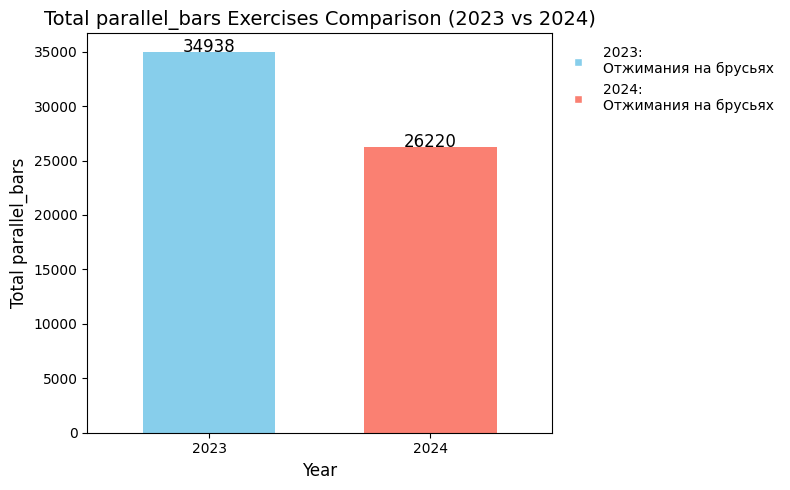

In [5]:
# Filter exercises with "подтягивания"
pull_up_exercises = pivot_table[pivot_table['Exercise'].str.contains('Отжимания на брусьях', case=False, na=False)]

# Calculate total sum of pull-up exercises for each year
total_pull_ups = pull_up_exercises[['2023', '2024']].sum()

# Collect exercise names for the legend
exercises_2023 = pull_up_exercises.loc[pull_up_exercises['2023'] > 0, 'Exercise'].tolist()
exercises_2024 = pull_up_exercises.loc[pull_up_exercises['2024'] > 0, 'Exercise'].tolist()

# Plotting
plt.figure(figsize=(8, 5))

# Bar plot for total pull-ups
bars = total_pull_ups.plot(kind='bar', color=['skyblue', 'salmon'], width=0.6)

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total parallel_bars', fontsize=12)
plt.title('Total parallel_bars Exercises Comparison (2023 vs 2024)', fontsize=14)
plt.xticks(rotation=0, fontsize=10)

# Add total numbers on top of each bar
for idx, value in enumerate(total_pull_ups):
    plt.text(idx, value + 10, f'{int(value)}', ha='center', fontsize=12)

# Add a legend with exercise types
handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', 
               label=f"2023:\n{chr(10).join(exercises_2023)}"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='salmon',
               label=f"2024:\n{chr(10).join(exercises_2024)}"),
]
# handles = [
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', markersize=15, label="2023"),
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='salmon', markersize=15, label="2024"),
# ]

# Add legend with colored boxes
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

plt.tight_layout()

# Save and show the plot
plt.savefig("total_parallel_bars_comparison_with_legend.png", bbox_inches="tight")
plt.show()

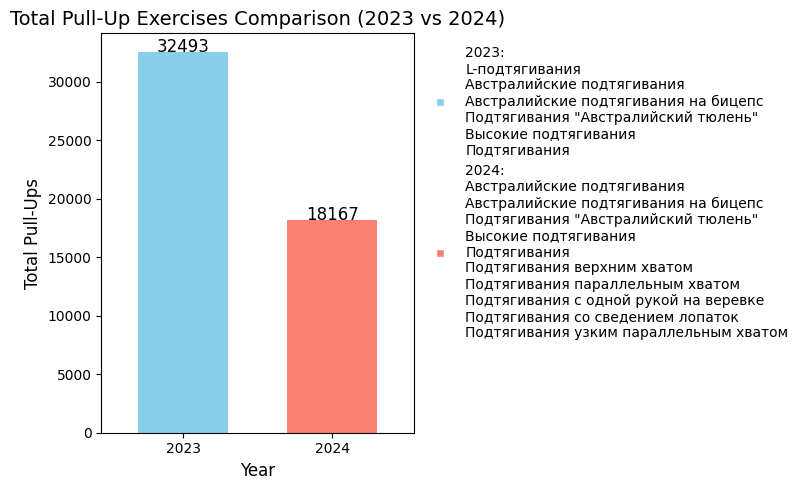

In [6]:
# Filter exercises with "подтягивания"
pull_up_exercises = pivot_table[pivot_table['Exercise'].str.contains('подтягивания', case=False, na=False)]

# Calculate total sum of pull-up exercises for each year
total_pull_ups = pull_up_exercises[['2023', '2024']].sum()

# Collect exercise names for the legend
exercises_2023 = pull_up_exercises.loc[pull_up_exercises['2023'] > 0, 'Exercise'].tolist()
exercises_2024 = pull_up_exercises.loc[pull_up_exercises['2024'] > 0, 'Exercise'].tolist()

# Plotting
plt.figure(figsize=(8, 5))

# Bar plot for total pull-ups
bars = total_pull_ups.plot(kind='bar', color=['skyblue', 'salmon'], width=0.6)

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Pull-Ups', fontsize=12)
plt.title('Total Pull-Up Exercises Comparison (2023 vs 2024)', fontsize=14)
plt.xticks(rotation=0, fontsize=10)

# Add total numbers on top of each bar
for idx, value in enumerate(total_pull_ups):
    plt.text(idx, value + 10, f'{int(value)}', ha='center', fontsize=12)

# Add a legend with exercise types
handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', 
               label=f"2023:\n{chr(10).join(exercises_2023)}"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='salmon',
               label=f"2024:\n{chr(10).join(exercises_2024)}"),
]
# handles = [
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', markersize=15, label="2023"),
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='salmon', markersize=15, label="2024"),
# ]

# Add legend with colored boxes
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

plt.tight_layout()

# Save and show the plot
plt.savefig("total_pull_up_comparison_with_legend.png", bbox_inches="tight")
plt.show()

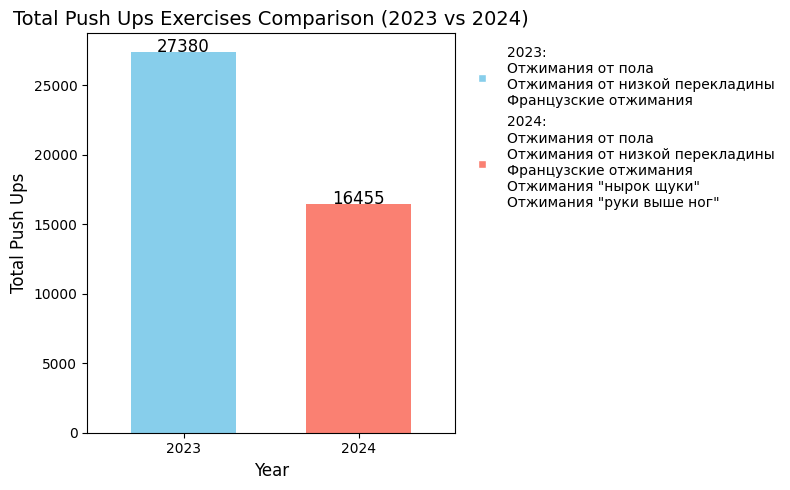

In [7]:
pull_up_exercises = pivot_table[
    pivot_table['Exercise'].str.contains('отжимания', case=False, na=False) &
    ~pivot_table['Exercise'].str.contains('Отжимания на брусьях', case=False, na=False)
]


# Calculate total sum of pull-up exercises for each year
total_pull_ups = pull_up_exercises[['2023', '2024']].sum()

# Collect exercise names for the legend
exercises_2023 = pull_up_exercises.loc[pull_up_exercises['2023'] > 0, 'Exercise'].tolist()
exercises_2024 = pull_up_exercises.loc[pull_up_exercises['2024'] > 0, 'Exercise'].tolist()

# Plotting
plt.figure(figsize=(8, 5))

# Bar plot for total pull-ups
bars = total_pull_ups.plot(kind='bar', color=['skyblue', 'salmon'], width=0.6)

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Push Ups', fontsize=12)
plt.title('Total Push Ups Exercises Comparison (2023 vs 2024)', fontsize=14)
plt.xticks(rotation=0, fontsize=10)

# Add total numbers on top of each bar
for idx, value in enumerate(total_pull_ups):
    plt.text(idx, value + 10, f'{int(value)}', ha='center', fontsize=12)

# Add a legend with exercise types
handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', 
               label=f"2023:\n{chr(10).join(exercises_2023)}"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='salmon',
               label=f"2024:\n{chr(10).join(exercises_2024)}"),
]
# handles = [
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='skyblue', markersize=15, label="2023"),
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='salmon', markersize=15, label="2024"),
# ]

# Add legend with colored boxes
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

plt.tight_layout()

# Save and show the plot
plt.savefig("total_push_ups_comparison_with_legend.png", bbox_inches="tight")
plt.show()

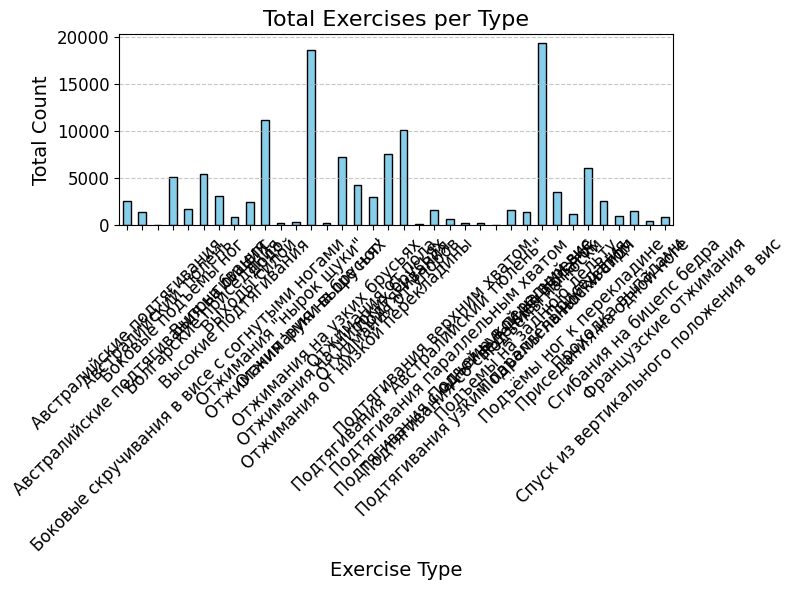

In [27]:
exercise_sums = df.drop(columns=['date']).sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
exercise_sums.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Total Exercises per Type', fontsize=16)
plt.xlabel('Exercise Type', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()